In [1]:
#Installing the Spotify Web API
!pip install spotipy

In [11]:
##### Importing necessary packages for data cleaning and analysis
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [12]:
##### Authenticating and connecting to the API. For this I created an Spotify Developer's account. 
##### For the purpose of this analysis, I registered an application, and received a unique Client ID and secret.


username = '1165605526'
client_id ='ac39ed7e7a3545bdb6626a4f2c54f464'
client_secret = 'e3604f1aca454a1687f87e0e8318aa80'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

#Requesting an access token
token = util.prompt_for_user_token(username = username, 
                                   scope = scope, 
                                   client_id = client_id,   
                                   client_secret = client_secret,     
                                   redirect_uri = redirect_uri)

In [13]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [14]:
print(token)

BQB-aNfhMjH6oyOlwMWEWHMHXf5wAXHSHU80tQqvv1ZVX_XL5r9M2TPpDWfqIAal1L_jUwlAxXd7IlDbO5N7EwcaRMjlpX7phh867w-VfPp1JuTYKVn-xhWHEejMyYuKRG5Myg8Pal7k0afNv8M9qQI


In [15]:
#Defining a function to pull tracks from the playlist
def RetrieveTrackIDs(user, playlist_id):
    Track_list = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        Track_list.append(track['id'])
    return Track_list

In [16]:
#Retrieving track list for Madmen
Track_list = RetrieveTrackIDs('e3b05vc8hqomuhf01m831d6zw','3tAKAgNdwEsG1jdWngayBj')

In [17]:
#Retrieving track list for Madmen
Track_list2 = RetrieveTrackIDs('x13swcx4g0sv93drma3ubjx1b','02JJAdWKby7lOXq6I2O0n8')

In [18]:
#Creating a function to retrieve audio features data for each track on the playlist
def RetrieveTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  #Addign features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']

  track = [name, album, artist, release_date, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
  return track

In [19]:
# looping over Track_list for Madmen
tracks = []
for i in range(len(Track_list)):
  time.sleep(.5)
  track = RetrieveTrackFeatures(Track_list[i])
  tracks.append(track)

# create dataset
df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
df.to_csv("Madmen_soundtrack.csv", sep = ',')

In [20]:
# looping over Track_list for Whitelines
tracks2 = []
for i in range(len(Track_list2)):
  time.sleep(.5)
  track2 = RetrieveTrackFeatures(Track_list2[i])
  tracks2.append(track2)

# create dataset
df2 = pd.DataFrame(tracks2, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
df2.to_csv("Whitelines_soundtrack.csv", sep = ',')

In [21]:
df.head(3)

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Zou Bisou Bisou,Twistin'The Rock Vol 9,Gillian Hills,2002-01-01,135653,0,0.889,0.769,0.483,0.01020,0.0626,-9.177,0.0381,130.991,4
1,Rain Drop Sounds,Rain Drops,Rain Radiance,2019-11-03,43720,28,0.731,0.147,0.759,0.98600,0.5640,-29.784,0.0824,137.609,3
2,Shahdaroba,In Dreams,Roy Orbison,1963-07,159240,0,0.711,0.482,0.451,0.00131,0.1750,-9.285,0.0286,109.323,4


In [22]:
#Checking how many rows and columns are in the df for Madmen
df.shape

(100, 15)

In [23]:
#Checking how many rows and columns are in the df for Whitelines
df2.shape

(98, 15)

In [24]:
#Adding a column indicating whether it belongs to the Madmen[1] or Whitelines[0] soundtrack.
df['Group'] = 1
df2['Group'] = 0

In [25]:
df2.head(1)

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Group
0,DÉJALO,DÉJALO,A.CHAL,2018-11-30,199485,36,0.143,0.805,0.386,0.285,0.111,-10.628,0.213,131.09,4,0


In [26]:
# Combining both data frames into one for analysis
df_shows = df.append(df2)
df_shows.reset_index(inplace= True)
df_shows.sample(3)

,index,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Group
71,71,Gonzo,Mad Men: A Musical Companion (1960-1965),Various Artists,2011-01-01,144013,0,0.388,0.471,0.434,0.753000,0.121,-9.602,0.0331,63.335,4,1
44,44,Bye Bye Birdie - From the Columbia Pictures Pr...,Let Me Entertain You,Ann-Margret,1996-07-29,131266,18,0.842,0.562,0.839,0.000000,0.357,-4.206,0.0500,115.520,4,1
104,4,In My Zone,Tired Of Waiting Vol. 1,Ju Fresh,2020-09-04,225103,12,0.282,0.786,0.621,0.000015,0.208,-7.029,0.3010,145.062,4,0


In [67]:
df_shows['Year'] = df_shows.release_date.apply(lambda x: x[0:4])
df_shows.head(2)

,index,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Group,Year
0,0,Zou Bisou Bisou,Twistin'The Rock Vol 9,Gillian Hills,2002-01-01,135653,0,0.889,0.769,0.483,0.0102,0.0626,-9.177,0.0381,130.991,4,1,2002
1,1,Rain Drop Sounds,Rain Drops,Rain Radiance,2019-11-03,43720,28,0.731,0.147,0.759,0.9860,0.5640,-29.784,0.0824,137.609,3,1,2019


In [59]:
# Create data frame with features
dfshows_features = df_shows[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'Group']]
dfshows_features.sample(2)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,Group
90,0.265,0.646,0.668,0.000,0.0688,0.0479,1
20,0.981,0.186,0.183,0.897,0.1220,0.0408,1


In [60]:
df_madmen = dfshows_features[dfshows_features['Group'] == 1]
df_madmen.head(3)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,Group
0,0.889,0.769,0.483,0.01020,0.0626,0.0381,1
1,0.731,0.147,0.759,0.98600,0.5640,0.0824,1
2,0.711,0.482,0.451,0.00131,0.1750,0.0286,1


In [61]:
df_madmen = df_madmen.drop('Group',1)
df_madmen.head(1)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness
0,0.889,0.769,0.483,0.0102,0.0626,0.0381


In [62]:
df_whitelines = dfshows_features[dfshows_features['Group'] == 0]
df_whitelines.head(3)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,Group
100,0.1430,0.805,0.386,0.285,0.111,0.213,0
101,0.5110,0.407,0.913,0.000,0.113,0.246,0
102,0.0468,0.556,0.802,0.000,0.416,0.355,0


In [63]:
df_whitelines = df_whitelines.drop('Group',1)
df_whitelines.head(1)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness
100,0.143,0.805,0.386,0.285,0.111,0.213


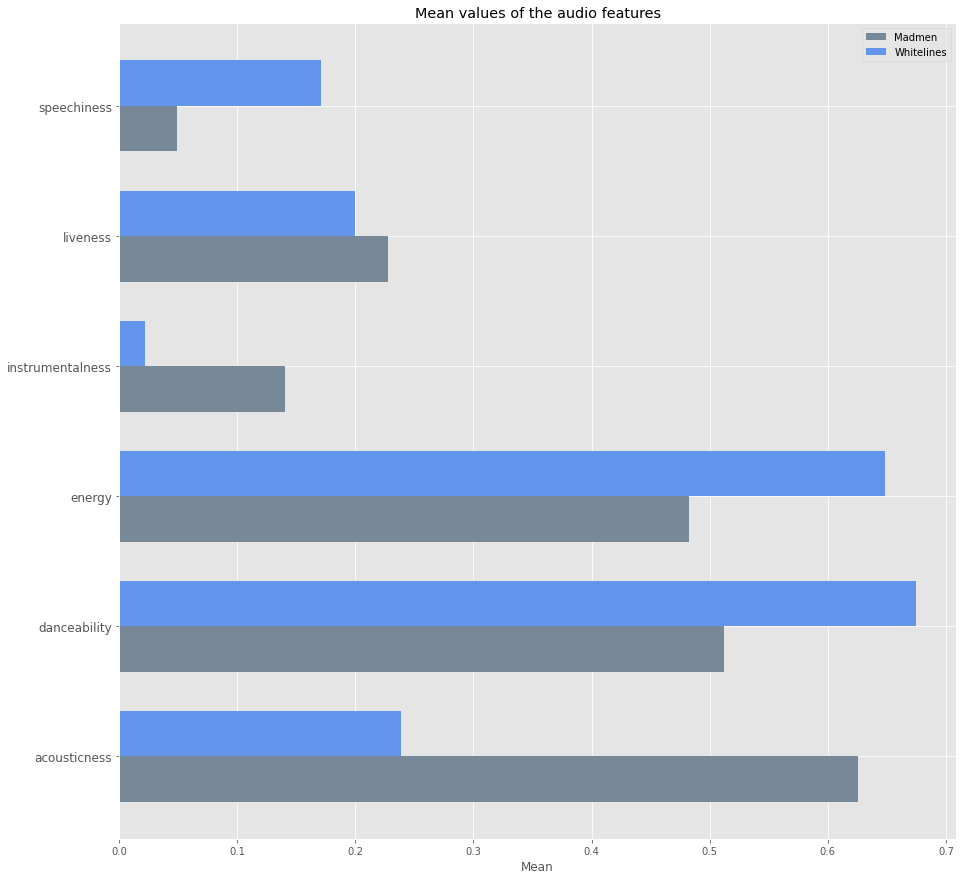

In [64]:
# Number of features
N = len(df_madmen.mean())
# Array with the number of features
ind = np.arange(N) 

width = 0.35  
#Bar plot with my list
plt.barh(ind, df_madmen.mean() , width, label='Madmen', color = 'lightslategray')
#Bar plot with her list
plt.barh(ind + width, df_whitelines.mean(), width, label='Whitelines', color = 'CornflowerBlue')

#X- label
plt.xlabel('Mean', fontsize = 12)
# Title
plt.title('Mean values of the audio features')
#Vertical ticks
plt.yticks(ind + width / 2, (list(df_whitelines)[:]), fontsize = 12)
#legend
plt.legend(loc='best')
# Figure size
plt.rcParams['figure.figsize'] =(10,6)
# Set style
style.use("ggplot")

plt.show()

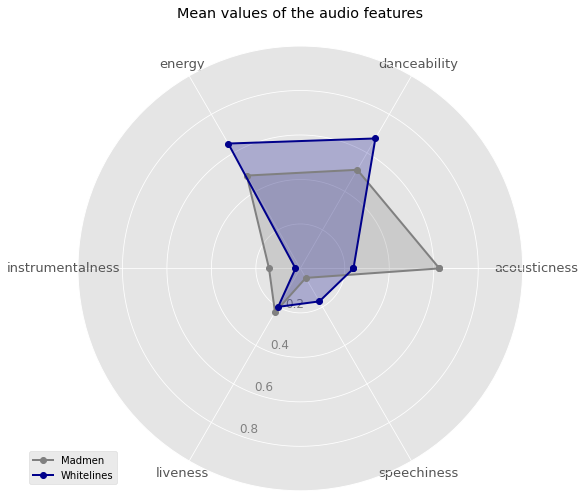

In [166]:
labels= list(df_madmen)[:]
stats= df_madmen.mean().tolist()
stats2 = df_whitelines.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "Madmen", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "Whitelines", color = 'DarkBlue')
ax.fill(angles, stats2, alpha=0.25, facecolor='DarkBlue' )
ax.set_title('Mean values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

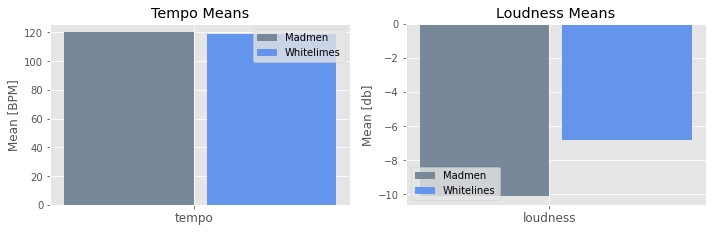

In [41]:
tempo_whitelines = df_shows.loc[ df_shows.Group == 0, ['tempo']]
tempo_madmen = df_shows.loc[ df_shows.Group == 1, ['tempo']]

N = len(tempo_whitelines.mean())

ind = np.arange(N) 

plt.subplot(221)
width = 0.35      
plt.bar(ind, tempo_madmen.mean() , width, label='Madmen', color = 'lightslategray')
plt.bar(ind + 1.1*width, tempo_whitelines.mean(), width, label='Whitelimes', color = 'CornflowerBlue')

plt.ylabel('Mean [BPM]', fontsize = 12)
plt.title('Tempo Means')

plt.xticks(ind + width / 2, (list(tempo_whitelines)[:]), fontsize = 12)
plt.legend(loc='best')
style.use("ggplot")


plt.subplot(222)

loud_whitelines = df_shows.loc[ df_shows.Group == 0, ['loudness']]
loud_madmen = df_shows.loc[ df_shows.Group == 1, ['loudness']]

N = len(loud_whitelines.mean())

ind = np.arange(N) 

width = 0.35      
plt.bar(ind, loud_madmen.mean() , width, label='Madmen', color = 'lightslategray')
plt.bar(ind + 1.1*width, loud_whitelines.mean(), width, label='Whitelines', color = 'CornflowerBlue')

plt.ylabel('Mean [db]', fontsize = 12)
plt.title('Loudness Means')



plt.xticks(ind + width / 2, (list(loud_whitelines)[:]), fontsize = 12)
plt.legend(loc='lower left')
style.use("ggplot")
plt.rcParams['figure.figsize'] =(12,12)
plt.tight_layout()
plt.show()

In [42]:
tempo_madmen.mean()

tempo    120.06798
dtype: float64

In [43]:
tempo_whitelines.mean()

tempo    118.579673
dtype: float64

In [44]:
loud_madmen.mean()

loudness   -10.12337
dtype: float64

In [46]:
loud_whitelines.mean()

loudness   -6.806694
dtype: float64

In [36]:
round(df_madmen.std().mean(),2)

0.19

In [37]:
round(df_whitelines.std().mean(),2)

0.15

In [38]:
df_madmen.std().mean()

0.1942593777669397

In [39]:
df_whitelines.std().mean()

0.14519735354402688

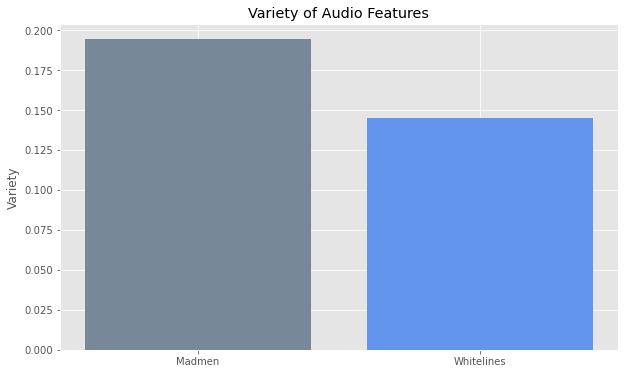

In [40]:
data = [df_madmen.std().mean(), df_whitelines.std().mean()]
names = ('Madmen','Whitelines')
pos = np.arange(len(names))
colors = ['lightslategray', 'CornflowerBlue']

plt.bar(pos, data, align = 'center', color = colors)
plt.xticks(pos, names)
plt.ylabel('Variety')
plt.title('Variety of Audio Features')
plt.show()

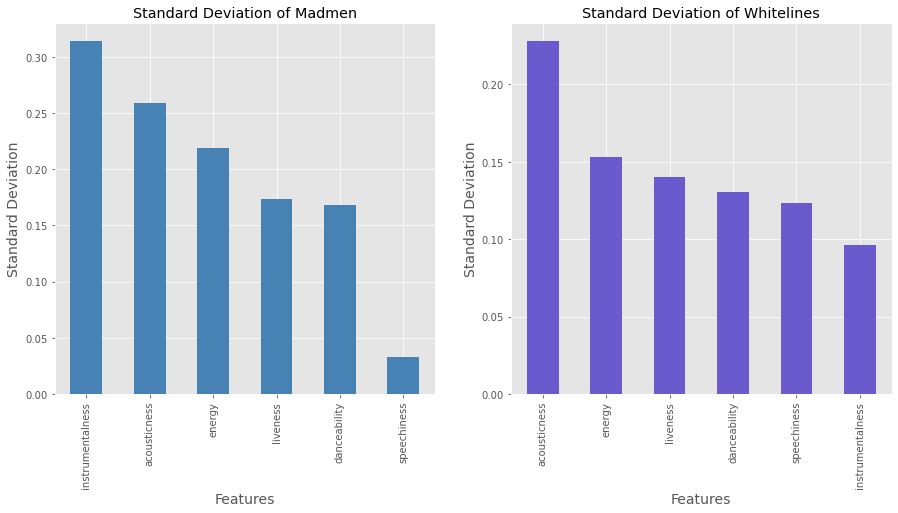

In [50]:
plt.subplot(221)

df_madmen.std().sort_values(ascending= False).plot(kind = 'bar', color = 'SteelBlue')

plt.xlabel('Features', fontsize = 14)
plt.ylabel('Standard Deviation', fontsize = 14)
plt.title("Standard Deviation of Madmen")

plt.subplot(222)
df_whitelines.std().sort_values(ascending= False).plot(kind = 'bar', color = 'SlateBlue')

plt.xlabel('Features', fontsize = 14)
plt.ylabel('Standard Deviation', fontsize = 14)
plt.title("Standard Deviation of Whitelines")
plt.rcParams['figure.figsize'] =(15,15)

In [126]:
dfshows_year = df_shows[['Year', 'Group']]
dfshows_year.sample(10)

,Year,Group
77,2011,1
161,2018,0
26,2010,1
66,2011,1
45,1995,1
121,2018,0
1,2019,1
137,2020,0
49,2010,1
59,2012,1


In [127]:
dfshows_year.sort_values(['Year'], ascending=[True], inplace=True)
dfshows_year.head(2)

<ipython-input-127-aaabd479a850>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfshows_year.sort_values(['Year'], ascending=[True], inplace=True)


,Year,Group
25,1953,1
42,1954,1


In [154]:
#Creating a pivot table to count the number of songs per release year for each playlist
Soundtrack_ByYear = pd.crosstab(index=dfshows_year["Year"], 
                          columns=dfshows_year["Group"])

Soundtrack_ByYear

Group,0,1
Year,,
1953,0,1
1954,0,1
1959,0,1
1962,0,1
1963,0,2
1964,0,1
1965,0,1
1966,0,1
1967,0,1


Text(0.5, 1.0, 'Soundtracks by Release Year')

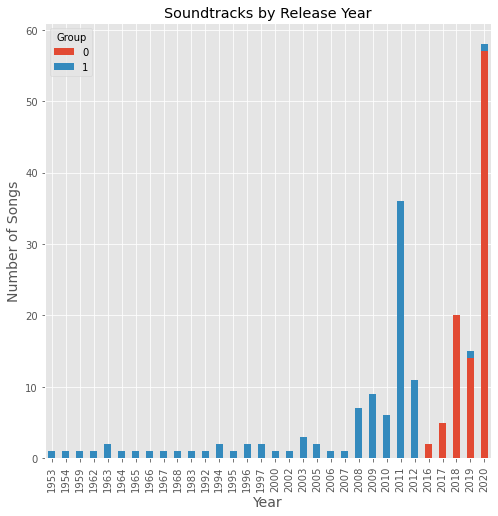

In [165]:
#Visualizing the pivot table outlined above
Soundtrack_ByYear.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Songs', fontsize = 14)
plt.title("Soundtracks by Release Year")